In [57]:
import numpy as np
import pandas as pd

In [58]:
df = pd.read_csv(r"D:/User/Downloads/tripadvisor_hotel_reviews.csv")

# CLEANING THE DATA

In [59]:
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [60]:
df[ "Rating"].value_counts()

Rating
5    9054
4    6039
3    2184
2    1793
1    1421
Name: count, dtype: int64

In [61]:
df_neg = df.loc[df["Rating"] <= 2]
df_neg = df_neg.reset_index(drop=True)

In [62]:
df_five = df.loc[df[ "Rating"] >= 3]
df_five = df_five.reset_index (drop = True)

In [63]:
df_pos = df_five.loc[:len(df_neg)]

In [64]:
len(df_pos)

3215

In [65]:
df_all=pd.concat([df_neg, df_pos], axis=0)
df_all=df_all.reset_index(drop= True)
len(df_all)

6429

In [66]:
df_all.head()

,Review,Rating
0,ok nothing special charge diamond member hilto...,2
1,"poor value stayed monaco seattle july, nice ho...",2
2,horrible customer service hotel stay february ...,1
3,disappointed say anticipating stay hotel monac...,2
4,great location need internally upgrade advanta...,2


# CREATE A SENTIMENTS COLUMN

In [67]:
df_all["Sentiment"] = np.where(df_all["Rating"] >= 3, "Positive", "Negative" )

In [68]:
df_all = df_all.sample(frac = 1)
df_all.reset_index(drop = True)

,Review,Rating,Sentiment
0,great hotel decent service stayed ritz group 4...,4,Positive
1,great hotel great hotel cetre time square help...,5,Positive
2,"ca n't meet obligations singaporean, reservati...",1,Negative
3,excellent choice stayed airport hilton night a...,5,Positive
4,"great resort family, 2 adults 2 children ages ...",4,Positive
...,...,...,...
6424,resort beautiful thats ends just returned 5 da...,2,Negative
6425,"excellent stay wow, fantastic stay, hotel perf...",5,Positive
6426,hix great experience stayed loft 1 casa rodond...,5,Positive
6427,best trip say nicest resort stayed people frie...,5,Positive


In [69]:
df_all.head(10)

,Review,Rating,Sentiment
4905,great hotel decent service stayed ritz group 4...,4,Positive
4160,great hotel great hotel cetre time square help...,5,Positive
2677,"ca n't meet obligations singaporean, reservati...",1,Negative
4940,excellent choice stayed airport hilton night a...,5,Positive
5308,"great resort family, 2 adults 2 children ages ...",4,Positive
3158,vacation hell trip breezes punta cana describe...,1,Negative
2990,food great rest service poor stayed hotel time...,1,Negative
6080,beautiful beach iberostar bavaro feb 25 mar 4 ...,3,Positive
1247,okay not great stayed secrets excellence octob...,2,Negative
5377,beach wonderful husband stayed westin not trav...,3,Positive


# SPLITTING THE DATA

In [70]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_all.Review, df_all.Sentiment)

In [71]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer()
x_train_vec = v.fit_transform(x_train)
x_test_vec = v.transform(x_test)

# CLASSIFICATION

In [72]:
from sklearn import svm
clf_svm = svm.SVC(kernel = "linear")
clf_svm.fit(x_train_vec, y_train)

SVC(kernel='linear')

# TESTING THE RESULTS

In [73]:
clf_svm.score(x_test_vec, y_test)

0.8805970149253731

In [74]:
from sklearn.metrics import f1_score
f1_score(y_test, clf_svm.predict(x_test_vec), average = None)

array([0.87467363, 0.88598575])

# TESTING THE USER INPUT

In [75]:
rev = ["beautiful"]
rev_vec = v.transform(rev)
clf_svm.predict(rev_vec)

array(['Negative'], dtype=object)

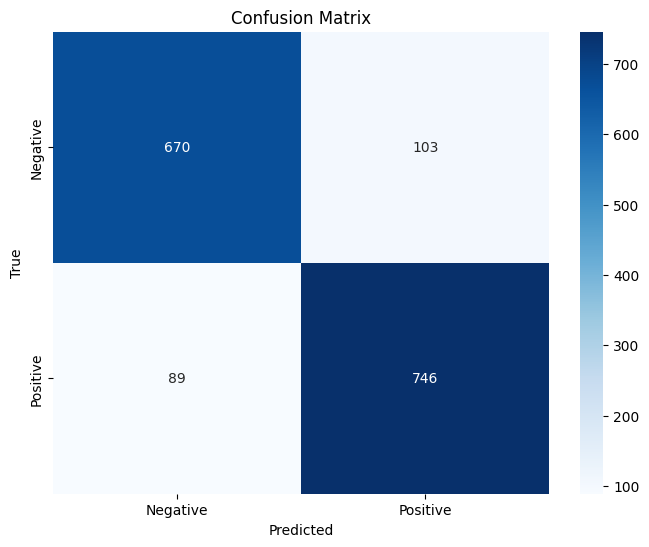

In [76]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

predictions = clf_svm.predict(x_test_vec)

conf_matrix = confusion_matrix(y_test, predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Bar plot for the distribution of ratings

C:\Users\HP\AppData\Local\Temp\ipykernel_5248\2370956984.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Rating', data=df_all, palette='Set1')


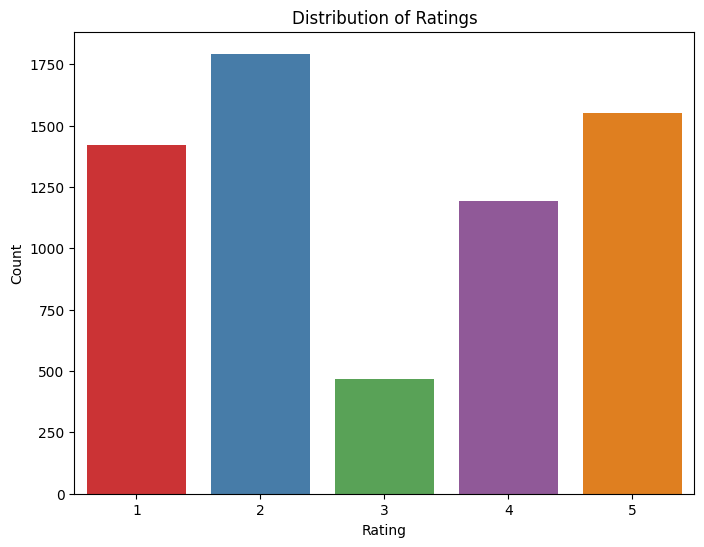

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=df_all, palette='Set1')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Bar plot for the distribution of sentiments

C:\Users\HP\AppData\Local\Temp\ipykernel_5248\4117307774.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df_all, palette='Set2')


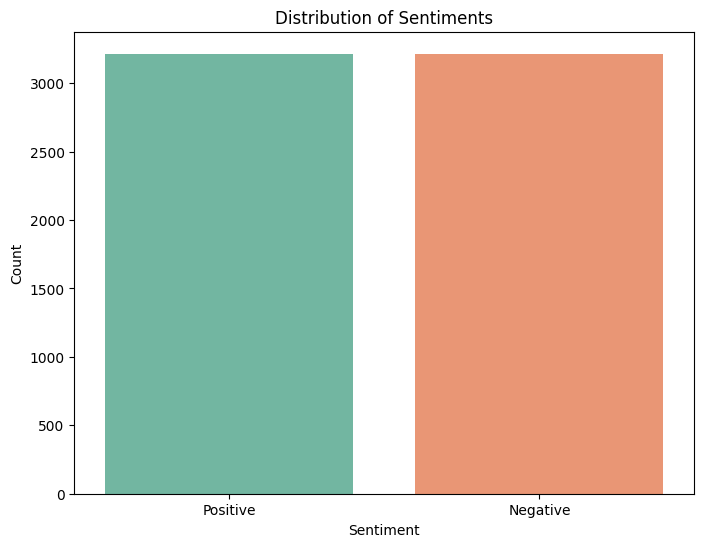

In [78]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_all, palette='Set2')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()